In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('./data/04_(문제)_회귀모델_drinking_water.csv')
df.head(10)

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2
5,3,3,3
6,4,4,4
7,2,2,2
8,3,2,3
9,4,2,3


In [47]:
df1 = df[['친밀도','적절성']]
df2 = df[['만족도']]

In [50]:
df1 = df1.to_numpy()
df2 = df2.to_numpy()

In [51]:
train_input, test_input, train_target, test_target = train_test_split(df1, df2, random_state=42)

print(train_input.shape)
print(train_target.shape)

(198, 2)
(198, 1)


In [26]:
### 특성항목 조합패턴 : 기본적인 조합은 2차원을 사용
# degree = 2
poly = PolynomialFeatures(degree = 5,include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input) 

poly.fit(test_input)
test_poly = poly.transform(test_input) 

print(train_poly.shape)
print('-----------------------------')
print(test_poly)

(198, 20)
-----------------------------
[[3.000e+00 4.000e+00 9.000e+00 ... 5.760e+02 7.680e+02 1.024e+03]
 [2.000e+00 3.000e+00 4.000e+00 ... 1.080e+02 1.620e+02 2.430e+02]
 [2.000e+00 2.000e+00 4.000e+00 ... 3.200e+01 3.200e+01 3.200e+01]
 ...
 [3.000e+00 3.000e+00 9.000e+00 ... 2.430e+02 2.430e+02 2.430e+02]
 [4.000e+00 3.000e+00 1.600e+01 ... 4.320e+02 3.240e+02 2.430e+02]
 [1.000e+00 4.000e+00 1.000e+00 ... 6.400e+01 2.560e+02 1.024e+03]]


In [27]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


0.6686865960782669
-1.0195702935601885


In [29]:
ss = StandardScaler()

In [31]:
ss.fit(train_poly, train_target)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [32]:
r = Ridge()
r.fit(train_scaled, train_target)
print("훈련 = ", r.score(train_scaled, train_target))
print("테스트 = ", r.score(test_scaled, test_target))

훈련 =  0.6428834595890419
테스트 =  0.6342200586076697


In [33]:
l = Lasso()
l.fit(train_scaled, train_target)
print("훈련 = ", l.score(train_scaled, train_target))
print("테스트 = ", l.score(test_scaled, test_target))

훈련 =  0.0
테스트 =  -0.03759780907668264


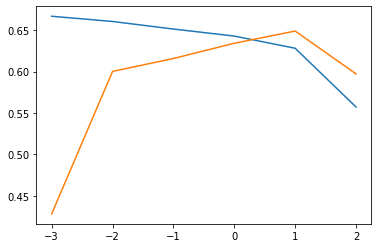

In [41]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []

#테스트시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
# 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [42]:
# 릿지모델
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.6513797753798242
0.6158302545734284


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.100e-01, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(


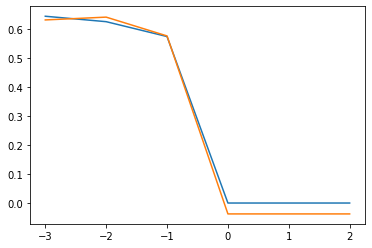

In [43]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []

#테스트시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 릿지모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
# 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [44]:
# 라쏘모델
lasso = Lasso(alpha = 0.1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.5747279941984322
0.5768481392356049


In [55]:
# 다중, 릿지, 라쏘 모두 결정계수가 낮아 사용하기 힘들어 보임

In [34]:
lr = LinearRegression()
lr.fit(train_input, train_target)  # 훈련모델 생성
lr.score(test_input, test_target)

0.5995961077787295

In [52]:
print(lr.coef_, lr.intercept_)

[[0.08329286 0.68737411]] [0.65308096]
